In [1]:
import sys
sys.path.insert(0, '/Users/Daniel/Documents/Imperial/MSciProject/BOUT-dev/tools/pylib/')

In [2]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boututils.showdata import showdata

import numpy as np
import matplotlib.pyplot as plt
from  IPython.display import HTML
import seaborn as sns
import os 

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20,10)
pal = sns.color_palette("Paired")

from matplotlib import rc, animation
%matplotlib inline
rc('animation', html='html5') 

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
path = '../braginskii/data'
df = DataFile(os.path.join(path, "BOUT.dmp.0.nc"))
q_t, kappa_0, T_t, n_t, c_st = -df['q_in'], df['kappa_0'], df['T_t'], df['n_t'] ,df['c_st']

print("Using kappa_0 = {0}, q_t = {1}, T_t = {2}".format(kappa_0, q_t, T_t))

dy = df['dy'][0][0]
L = np.linspace(0.5*dy, df['length']-0.5*dy , df['ny'])
T_analytic= lambda s : (T_t**(7/2) + (7*q_t*s)/(2*kappa_0) )**(2/7)

Using kappa_0 = 2000.0, q_t = 3500000.0, T_t = 20.0


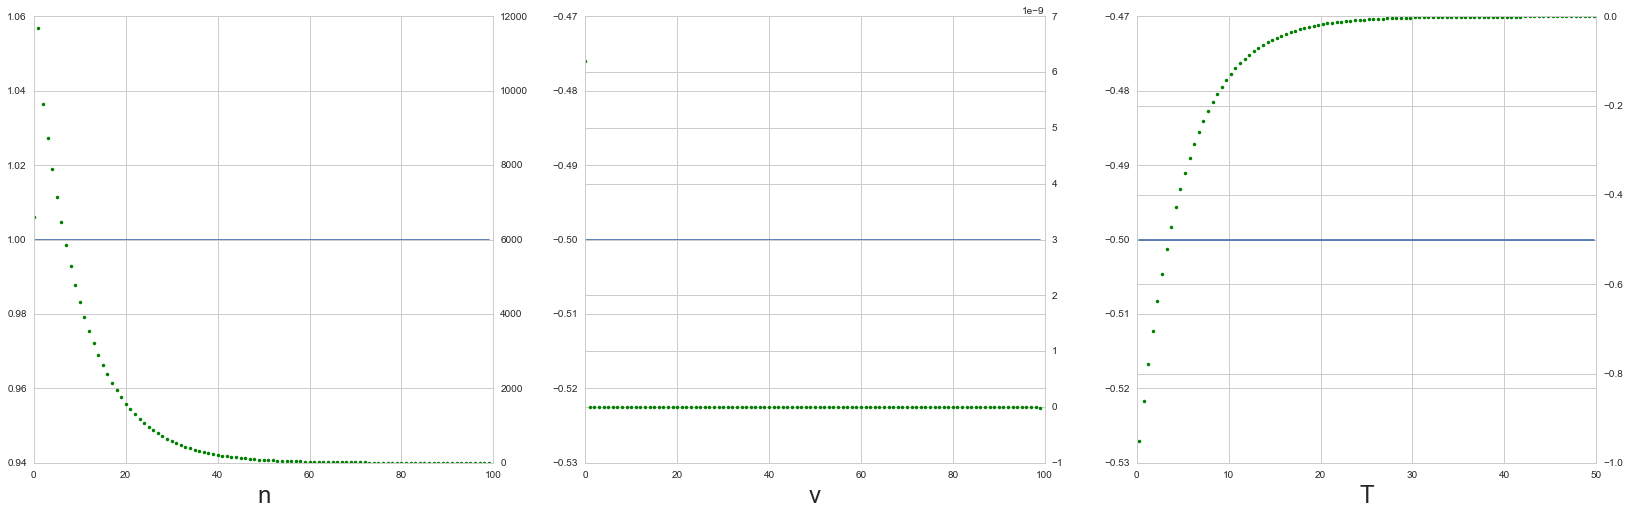

In [4]:
df = DataFile(os.path.join(path, "BOUT.dmp.0.nc"))
plt.figure(figsize=(28, 8))
sl = (0,0, slice(2, -2), 0)

plt.subplot(131).plot(df['n'][sl],  '-', label='n'); 
plt.subplot(131).set_xlabel("n", size=24)
plt.subplot(131).twinx().plot(df['ddt_n'][sl], 'g.', label='dn/dt'); 

plt.subplot(132).plot(df['v'][sl], '-', label='v');
plt.subplot(132).set_xlabel("v", size=24)
plt.subplot(132).twinx().plot(df['ddt_v'][sl],'g.', label='dv/dt'); 

plt.subplot(133).plot(L, df['n'][sl]*df['v'][sl], '-', label='T'); 
plt.subplot(133).set_xlabel("T", size=24)
plt.subplot(133).twinx().plot(L, -np.exp(-L/5), 'g.', label='dT/dt');

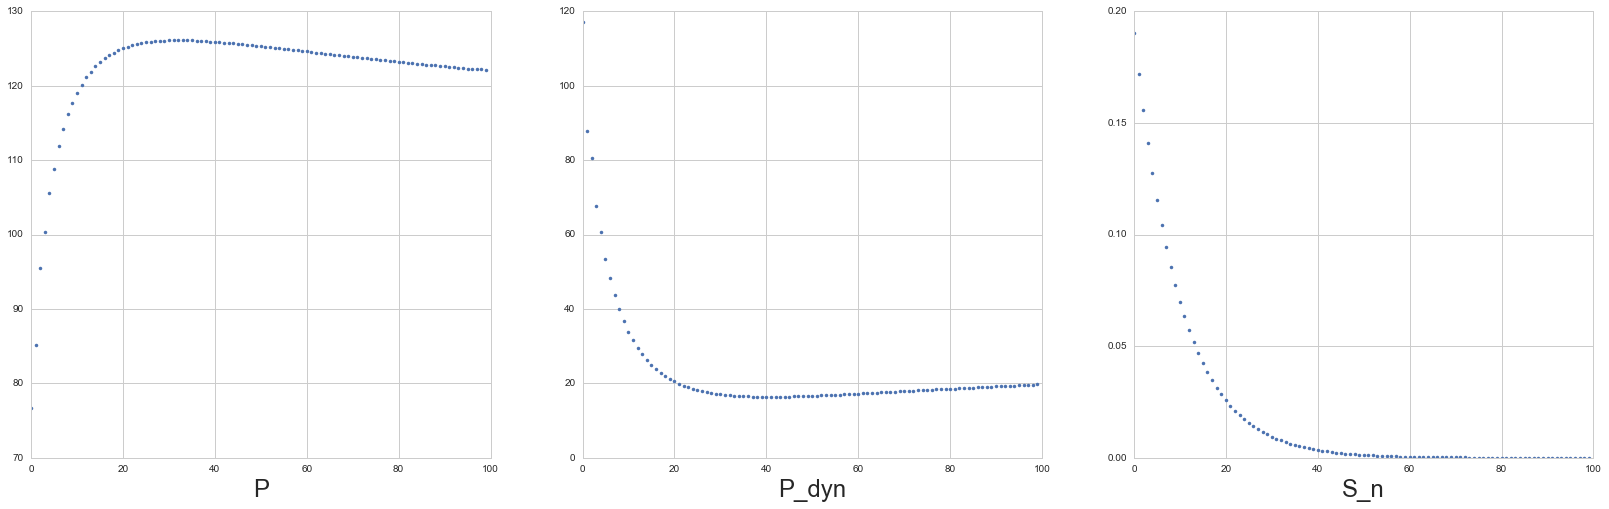

In [5]:
df = DataFile(os.path.join(path, "BOUT.dmp.0.nc"))
plt.figure(figsize=(28, 8))
sl = (10000,0, slice(2, -2), 0)

plt.subplot(131).plot(df['p'][sl], '.'); plt.subplot(131).set_xlabel("P", size=24)
plt.subplot(132).plot(df['p_dyn'][sl], '.'); plt.subplot(132).set_xlabel("P_dyn", size=24)
plt.subplot(133).plot(df['S_n'][sl[1:]], '.'); plt.subplot(133).set_xlabel("S_n", size=24)

In [6]:
import scipy.constants as constants
c = constants.c
m_i = 1e6*constants.physical_constants['proton mass energy equivalent in MeV'][0]/c**2
Liz = 5

T = lambda s : (T_t**(7/2) + (7*q_t*s)/(2*kappa_0) )**(2/7)
c_s = lambda T : np.sqrt(2*T/m_i)
Gamma = lambda s : -n_t*c_s(T_t)*np.exp(-s/Liz)
alpha = 2 * n_t * c_s(T_t)**2
n = lambda s : n_t * (c_s(T(s))/c_st)**-2 * (1 + np.sqrt(1 - (c_s(T(s))/c_st)**2 * (Gamma(s)/(n_t*c_st))**2))

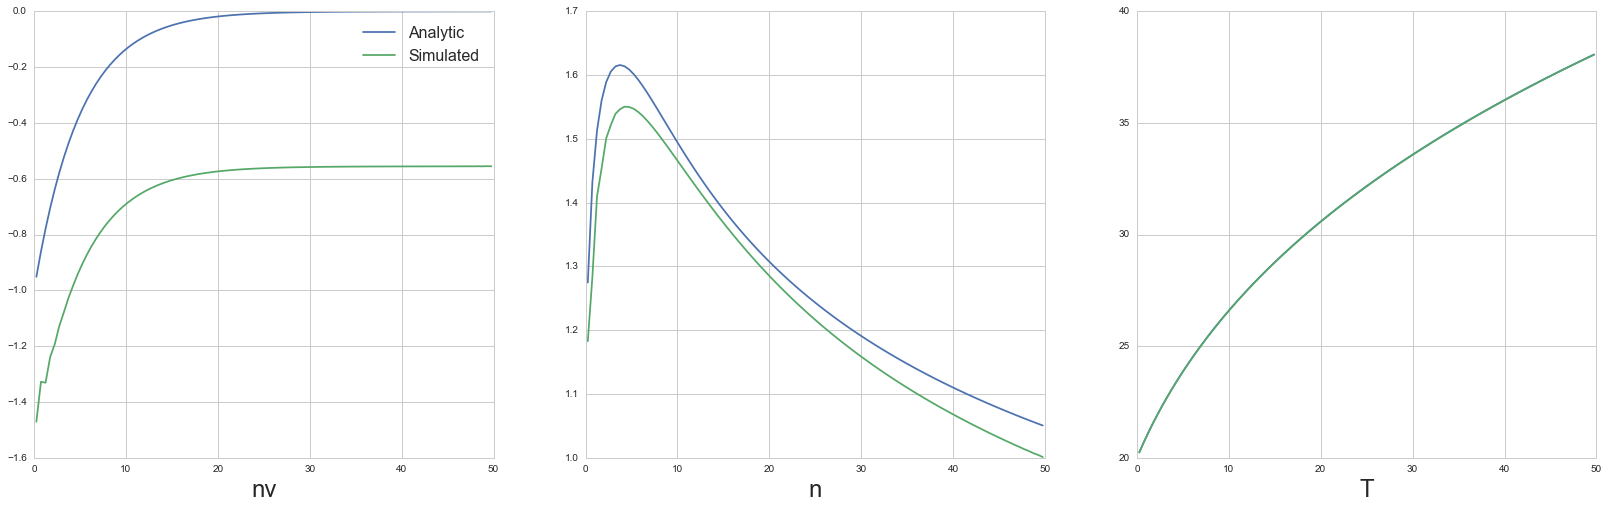

In [7]:
plt.figure(figsize=(28, 8))

plt.subplot(131).plot(L, Gamma(L)/(n_t*c_st), label="Analytic")
plt.subplot(131).plot(L, df['n'][sl]*df['v'][sl], label="Simulated")
plt.subplot(131).set_xlabel("nv", size=24)
plt.legend(fontsize=16)

plt.subplot(132).plot(L, n(L)/n_t)
plt.subplot(132).plot(L, df['n'][sl])
plt.subplot(132).set_xlabel("n", size=24)


plt.subplot(133).plot(L, T(L))
plt.subplot(133).plot(L, df['T'][sl])
plt.subplot(133).set_xlabel("T", size=24)


In [8]:
p = showdata(collect("n", path=path, yguards=False)[::10,0,:,0], interval=15)
plt.close()
p

mxsub = 1 mysub = 100 mz = 1

nxpe = 1, nype = 1, npe = 1

Reading from ../braginskii/data/BOUT.dmp.0.nc: [0-0][2-101] -> [0-0][0-99]


In [9]:
p = showdata(collect("v", path=path, yguards=False)[::10,0,:,0], interval=15)
plt.close()
p

mxsub = 1 mysub = 100 mz = 1

nxpe = 1, nype = 1, npe = 1

Reading from ../braginskii/data/BOUT.dmp.0.nc: [0-0][2-101] -> [0-0][0-99]


In [10]:
p = showdata(collect("t", path=path, yguards=False)[::10,0,:,0], interval=15)
plt.close()
p

Variable 't' not found. Using 'T' instead
mxsub = 1 mysub = 100 mz = 1

nxpe = 1, nype = 1, npe = 1

Reading from ../braginskii/data/BOUT.dmp.0.nc: [0-0][2-101] -> [0-0][0-99]
